In [1]:
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import random

In [2]:
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dirs = ["train", "valid", "test", "images to test"]
path = Path.cwd()
train_dir = str(path) + "\\" + dirs[0]
val_dir = str(path) + "\\" + dirs[1]
test_dir = str(path) + "\\" + dirs[2]

batch_size = 32

def generate(dataset):
    gen = ImageDataGenerator( rescale = 1.0/255. )
    x = gen.flow_from_directory(
        directory = dataset,
        color_mode="rgb",
        batch_size=batch_size,
        class_mode='categorical',
        target_size=(224,224)
    )
    return x

train_data = generate(train_dir)
val_data = generate(val_dir)
test_data = generate(test_dir)

Found 58388 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.


In [3]:
# Build the model
def construct(model_name):
    base_model = model_name
    base_model.trainable = False

    inputs = tf.keras.layers.Input(shape =(224,224,3), name = "input_layer")
    x = base_model(inputs)
    x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
    outputs = tf.keras.layers.Dense(400, activation = "softmax", name = "output_layer")(x)
    
    model = tf.keras.Model(inputs, outputs)
    return model

# Compile and fit the model
def fitness(model, epochs, epoch_steps):
    model.compile(
        loss = "categorical_crossentropy",
        optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
        metrics = ["accuracy"]
    )

    early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
    
    history = model.fit(
        train_data,
        epochs = epochs,
        steps_per_epoch = epoch_steps,
        validation_data = val_data,
        validation_steps = len(val_data),
        callbacks=[early]
    )
    return history, model.evaluate(test_data)

In [4]:
V2 = tf.keras.applications.MobileNetV2(include_top= False,)
model_V2  = construct(V2)
steps_per_epoch = len(train_data)
eval_V2  = fitness(model_V2 , 30, steps_per_epoch )
print('Accuracy of MobileNetV2: ', eval_V2[1][1])

Epoch 1/30
1825/1825 [==============================] - 3170s 2s/step - loss: 3.5656 - accuracy: 0.6139 - val_loss: 1.5708 - val_accuracy: 0.8045
Epoch 2/30
1825/1825 [==============================] - 1210s 663ms/step - loss: 1.9504 - accuracy: 0.8024 - val_loss: 1.7645 - val_accuracy: 0.8275
Epoch 3/30
1825/1825 [==============================] - 1168s 640ms/step - loss: 1.5034 - accuracy: 0.8520 - val_loss: 1.7076 - val_accuracy: 0.8480
Epoch 4/30
1825/1825 [==============================] - 1175s 644ms/step - loss: 1.2050 - accuracy: 0.8811 - val_loss: 1.6777 - val_accuracy: 0.8605
Epoch 5/30
1825/1825 [==============================] - 1172s 642ms/step - loss: 0.9959 - accuracy: 0.9019 - val_loss: 1.9311 - val_accuracy: 0.8635
Epoch 6/30
1825/1825 [==============================] - 1170s 641ms/step - loss: 0.8588 - accuracy: 0.9164 - val_loss: 1.8979 - val_accuracy: 0.8670
Epoch 7/30
1825/1825 [==============================] - 1218s 667ms/step - loss: 0.7543 - accuracy: 0.9274 - 

In [6]:
#model_V2.save('good_V2_model.h5')

1/1 [==============================] - 1s 983ms/step


'COPPERY TAILED COUCAL'

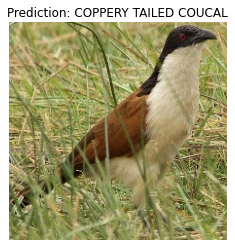

In [12]:
#check random picture
idx=random.randint(0,400)
file = test_dir + "\\" + str(names[idx]) + "\\1.jpg"
pred_and_plot(model_V2, file, names)


1/1 [==============================] - 0s 60ms/step
82 good guesses out of 100


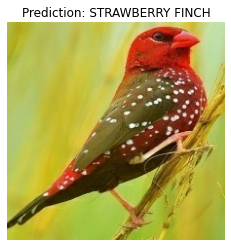

In [17]:
#check 100 pictures

names = os.listdir(dirs[0])
n = evaluation_100(model_V2)
print( n, 'good guesses out of 100' )